# Punto 4

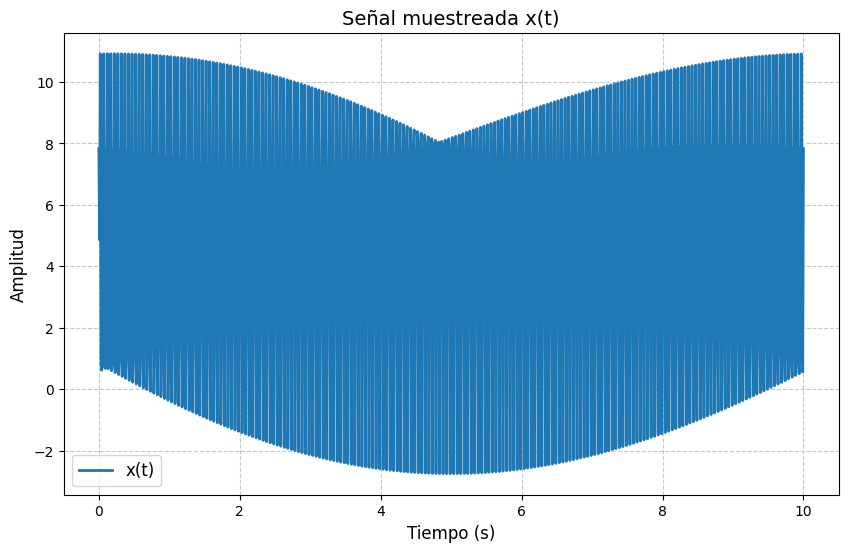

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
a = 1
k = 2*(a+1)
fs = 100 # Frecuencia de muestreo (Hz)
T = 10  # Duración de la señal (segundos)
t = np.linspace(0, T, fs*T)  # Vector de tiempo

# Valores de la señal
x = 4 * np.cos(80 * np.pi * t + np.pi / 4) + k * np.sin(40 * np.pi * t) + 5

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(t, x, label="x(t)", linewidth=2)
plt.title("Señal muestreada x(t)", fontsize=14)
plt.xlabel("Tiempo (s)", fontsize=12)
plt.ylabel("Amplitud", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12)
plt.show()


# 5. Periodograma welch

### a. reciba la señal x y haga la partición de la misma usando M muestras por segmento y S muestras de solapamiento

In [7]:
import numpy as np

# Función para particionar la señal en segmentos con solapamiento
def welch_partition(x, M, S):
    N = len(x)  # Longitud de la señal
    step = M - S  # Paso entre segmentos
    num_segments = (N - S) // step  # Número de segmentos posibles

    # Lista para guardar los segmentos
    segmentos = []
    for i in range(num_segments):
        start = i * step
        end = start + M
        if end <= N:
            segmentos.append(x[start:end])

    return np.array(segmentos)


Número de segmentos: 97
Forma de la matriz de segmentos: (97, 40)


### b. Por cada segmento, multiplicar por ventana w[n] y calcular la transformada discreta de Fourier del segmento enventanado

In [ ]:
# Función para aplicar la ventana y calcular la TDF
def compute_fft_segments(segmentos, window):
    fft_segments = []
    for segment in segmentos:
        segment_windowed = segment * window
        fft_segment = np.fft.fft(segment_windowed)  # Calcular la TDF
        fft_segments.append(fft_segment)

    return np.array(fft_segments)

### c. De la transformada de cada segmento obtener el periodograma modificado

In [ ]:
# Función para calcular el periodograma modificado
def compute_modified_periodogram(fft_segments, window):
    W = np.sum(window**2)  # Valor normalizador de la ventana
    periodograms = (1 / W) * (np.abs(fft_segments)**2)
    return periodograms

### d. Promediar los periodogramas modificados

In [ ]:
# Función para calcular el promedio de los periodogramas
def welch_psd(periodograms):
    return np.mean(periodograms, axis=0)

# 6. Validar el funcionamiento de la rutina

In [ ]:
# Parámetros de la señal
fs = 1000  # Frecuencia de muestreo (Hz)
t = np.linspace(0, 1, fs, endpoint=False)  # Vector de tiempo (1 segundo)
k = 4  # Valor de k
x = 4 * np.cos(80 * np.pi * t + np.pi / 4) + k * np.sin(40 * np.pi * t) + 5  # Señal de ejemplo

# Parámetros para Welch
M = 40  # Muestras por segmento
S = 30  # Muestras de solapamiento
window = np.hamming(M)  # Ventana Hamming

# Calcular Welch paso a paso
segmentos = welch_partition(x, M, S)  # Particionar la señal
fft_segments = compute_fft_segments(segmentos, window)  # Aplicar ventana y calcular TDF
periodograms = compute_modified_periodogram(fft_segments, window)  # Periodogramas modificados
psd = welch_psd(periodograms)  # Estimación PSD

# Validar dimensiones
segmentos.shape, fft_segments.shape, periodograms.shape, psd.shape


In [11]:
# Probar la función de partición
print("Probando welch_partition...")
segmentos_prueba = welch_partition(x, M, S)
print(f"Segmentos: {segmentos_prueba.shape}")

# Probar la función de TDF
print("\nProbando compute_fft_segments...")
fft_segments_prueba = compute_fft_segments(segmentos_prueba, window)
print(f"FFT de los segmentos: {fft_segments_prueba.shape}")

# Probar la función de periodograma modificado
print("\nProbando compute_modified_periodogram...")
periodograms_prueba = compute_modified_periodogram(fft_segments_prueba, window)
print(f"Periodogramas modificados: {periodograms_prueba.shape}")

# Probar la función para calcular PSD
print("\nProbando welch_psd...")
psd_prueba = welch_psd(periodograms_prueba)
print(f"PSD estimado: {psd_prueba.shape}")

# Mostrar los primeros valores del PSD para validación
print("\nPrimeros valores del PSD estimado:")
print(psd_prueba[:10])


Probando welch_partition...
Segmentos: (97, 40)

Probando compute_fft_segments...
FFT de los segmentos: (97, 40)

Probando compute_modified_periodogram...
Periodogramas modificados: (97, 40)

Probando welch_psd...
PSD estimado: (40,)

Primeros valores del PSD estimado:
[8.06287777e+02 3.16723906e+02 1.00690262e+02 3.58598899e+00
 1.30055038e-02 1.57036605e-02 1.54859176e-02 1.32422985e-02
 1.10950819e-02 9.38019715e-03]


#7. Filtros

In [14]:
import numpy as np

# Definición de aout para los dos casos
aout_1 = 1 / 10  # Caso 1: aout = ain / 10
aout_2 = 1 / 100  # Caso 2: aout = ain / 100

# Cálculo de dB usando la fórmula
dB_1 = 20 * np.log10(aout_1)
dB_2 = 20 * np.log10(aout_2)

dB_1, dB_2


(-20.0, -40.0)

Es por esto que para pasa altas se puede usar cualquiera desde rectangular.

y para el pasabajas se puede usar cualquiera debajo de hamming

### Filtros

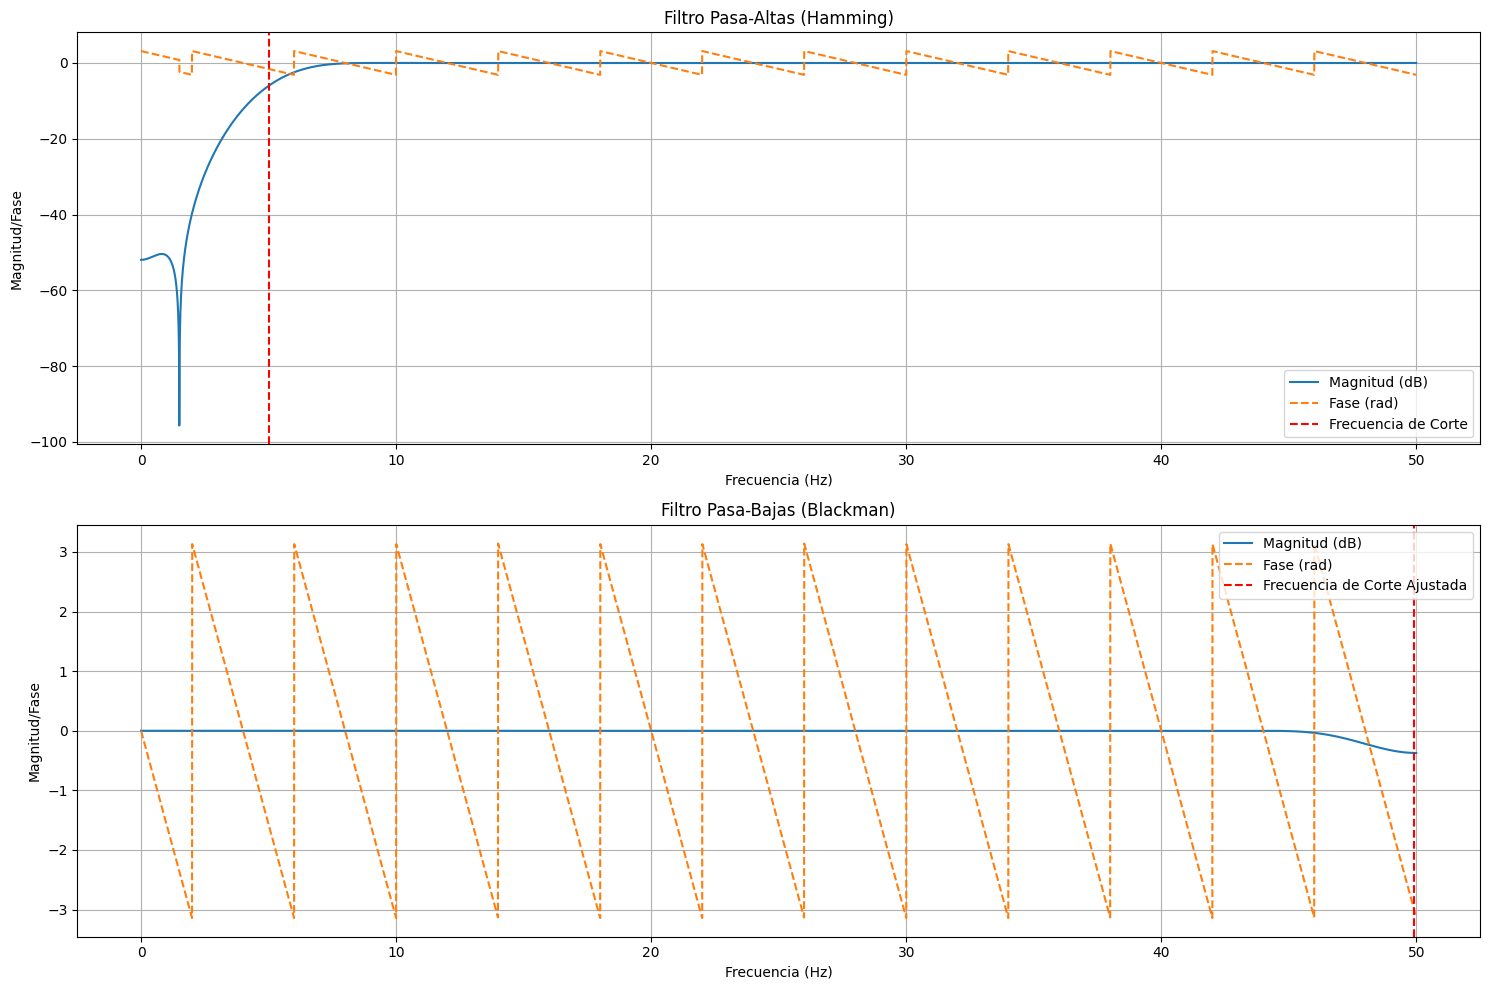

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz

# Parámetros generales
fs = 100  # Frecuencia de muestreo en Hz
nyquist = fs / 2  # Frecuencia de Nyquist

# 1. Filtro Pasa-Altas
fc_highpass = 5  # Frecuencia de corte pasa-altas en Hz
numtaps_hp = 51  # Número de coeficientes (debe ser impar para fase lineal)
highpass_coeffs = firwin(numtaps_hp, cutoff=fc_highpass / nyquist, window="hamming", pass_zero=False)

# Respuesta en frecuencia
w_hp, h_hp = freqz(highpass_coeffs, worN=8000, fs=fs)

# 2. Filtro Pasa-Bajas
fc_lowpass = 49.9  # Frecuencia de corte ajustada para el pasa-bajas en Hz
numtaps_lp = 51  # Número de coeficientes
lowpass_coeffs_blackman = firwin(numtaps_lp, cutoff=fc_lowpass / nyquist, window="blackman")

# Respuestas en frecuencia
w_lp_blackman, h_lp_blackman = freqz(lowpass_coeffs_blackman, worN=8000, fs=fs)

# Graficar resultados
plt.figure(figsize=(15, 10))

# Filtro pasa-altas
plt.subplot(2, 1, 1)
plt.plot(w_hp, 20 * np.log10(abs(h_hp)), label="Magnitud (dB)")
plt.plot(w_hp, np.angle(h_hp), label="Fase (rad)", linestyle="--")
plt.title("Filtro Pasa-Altas (Hamming)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud/Fase")
plt.axvline(fc_highpass, color='r', linestyle='--', label="Frecuencia de Corte")
plt.legend()
plt.grid()

# Filtro pasa-bajas (Blackman)
plt.subplot(2, 1, 2)
plt.plot(w_lp_blackman, 20 * np.log10(abs(h_lp_blackman)), label="Magnitud (dB)")
plt.plot(w_lp_blackman, np.angle(h_lp_blackman), label="Fase (rad)", linestyle="--")
plt.title("Filtro Pasa-Bajas (Blackman)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud/Fase")
plt.axvline(fc_lowpass, color='r', linestyle='--', label="Frecuencia de Corte Ajustada")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [24]:
# Mostrar coeficientes de los filtros
highpass_coeffs, lowpass_coeffs_blackman


(array([-1.01757585e-03, -1.05380353e-03, -1.05646865e-03, -9.54121029e-04,
        -6.40589667e-04, -5.88297725e-18,  1.05854462e-03,  2.56260514e-03,
         4.44183841e-03,  6.50489421e-03,  8.43426614e-03,  9.80311267e-03,
         1.01146507e-02,  8.86089720e-03,  5.59392154e-03, -2.92212538e-17,
        -8.03435404e-03, -1.83752551e-02, -3.06219976e-02, -4.41206097e-02,
        -5.80112247e-02, -7.13052305e-02, -8.29836784e-02, -9.21050405e-02,
        -9.79086418e-02,  8.99102483e-01, -9.79086418e-02, -9.21050405e-02,
        -8.29836784e-02, -7.13052305e-02, -5.80112247e-02, -4.41206097e-02,
        -3.06219976e-02, -1.83752551e-02, -8.03435404e-03, -2.92212538e-17,
         5.59392154e-03,  8.86089720e-03,  1.01146507e-02,  9.80311267e-03,
         8.43426614e-03,  6.50489421e-03,  4.44183841e-03,  2.56260514e-03,
         1.05854462e-03, -5.88297725e-18, -6.40589667e-04, -9.54121029e-04,
        -1.05646865e-03, -1.05380353e-03, -1.01757585e-03]),
 array([-2.76415761e-20, -2